# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей. 

In [1]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler


plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
# import wget
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip'
# wget.download(url, '/Users/artem/Downloads/data.txt.zip')

In [3]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [2]:
df = pd.read_csv('/Users/artem/Downloads/data.txt.zip', header=None)
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/artem/Downloads/data.txt.zip'

Посмотрим на статистики по данным.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

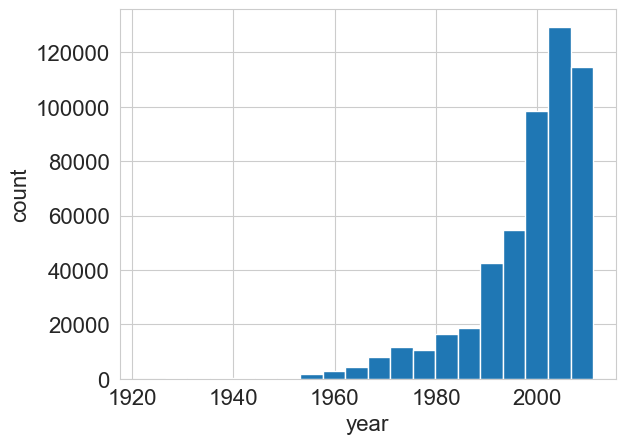

Range: 1922 - 2011
Unique values: 89


In [4]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model1 = Ridge()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, np.zeros(y_test.shape)+y_test.mean()))

89.74966397222073
117.6182574102307


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [9]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    """
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            model.backward(X_batch, criterion.backward(predictions, y_batch))
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')
    
    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [10]:
y_train_copy = (y_train - y_train.min()).reshape(-1,1)
y_val_copy = (y_val - y_val.min()).reshape(-1,1)

In [13]:
hidden_size = 128

model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, np.max(y_train) - np.min(y_train) + 1)
)

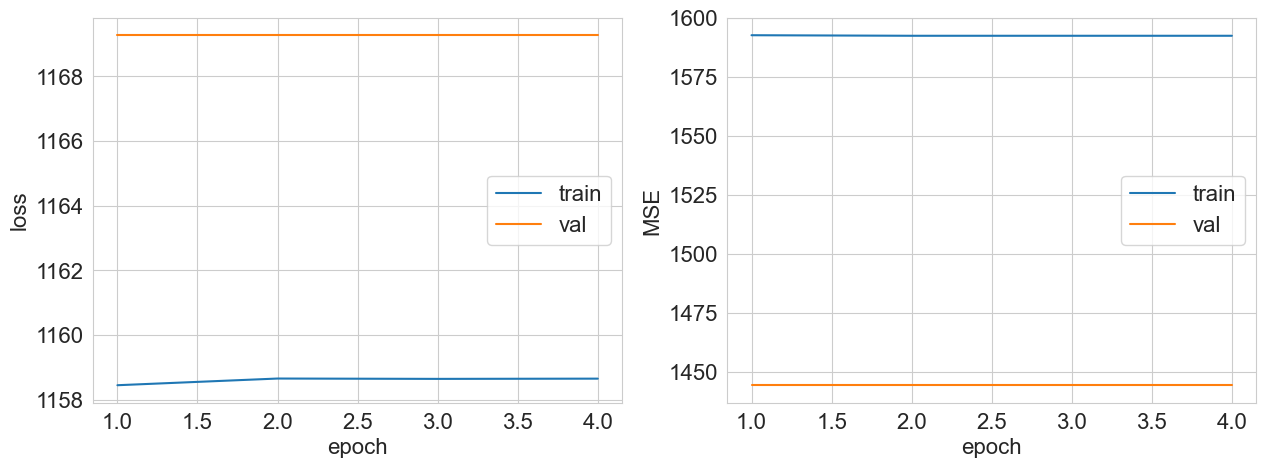

Validation MSE: 1444.451


(np.float64(1592.3774997326489), np.float64(1444.4513852235918))

In [13]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-3),
                   criterion=mm.CrossEntropyLoss(),
                   metric=lambda x, y: mean_squared_error(np.argmax(x, axis=1), y),
                   train_loader=mm.DataLoader(X_train, y_train_copy, batch_size=64, shuffle=True),
                   val_loader=mm.DataLoader(X_val, y_val_copy, batch_size=64, shuffle=False),
                   num_epochs=4)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Побить не удалось. Проблема кажется как раз в том, что год от года отличается не дискретно, а потому классификация ошибается порядочно.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [16]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1)
)

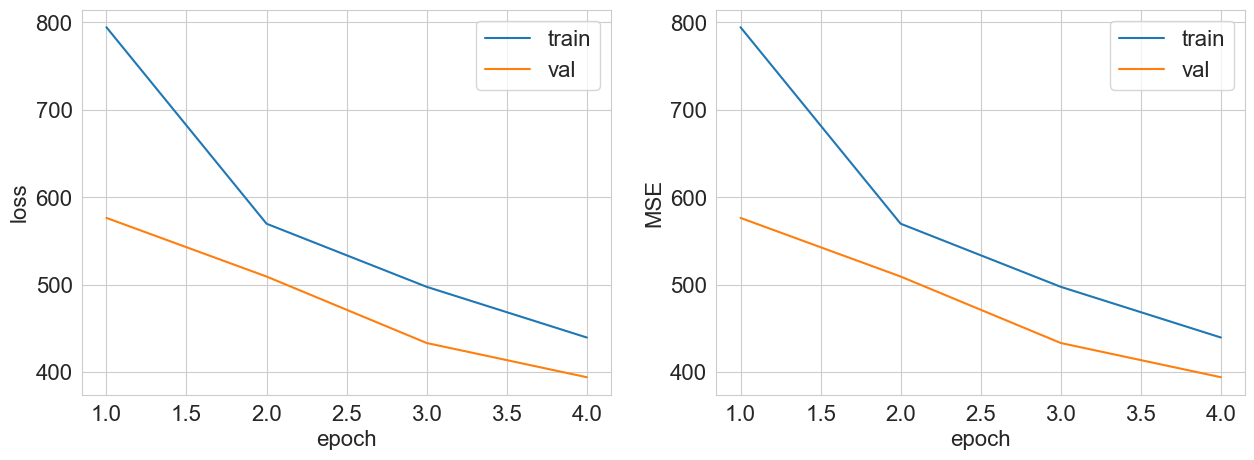

Validation MSE: 394.065


(np.float64(439.48558291829), np.float64(394.0645498263947))

In [17]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-7),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(x, y),
                   train_loader=mm.DataLoader(X_train, y_train_copy, batch_size=64, shuffle=True),
                   val_loader=mm.DataLoader(X_val, y_val_copy, batch_size=64, shuffle=False),
                   num_epochs=4)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Стало получше после уменьшения lr, до того была сравнимо плохо. Мне кажется играет факт того, что мы более гладко катаемся по многообразию годов, но это не панацея.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [11]:
min_train = np.min(y_train)
max_train = np.max(y_train)

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - min_train) / (max_train - min_train)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return sample * (max_train - min_train) + min_train

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [19]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1),
    mm.Sigmoid()
)

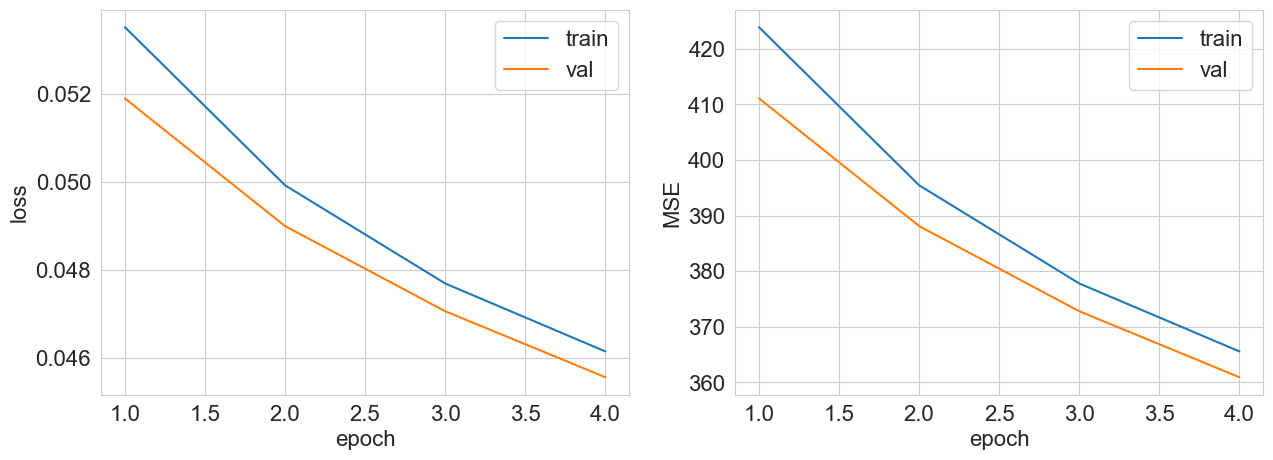

Validation MSE: 360.947


(np.float64(365.5844995592232), np.float64(360.94704054294596))

In [21]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-7),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
                   train_loader=mm.DataLoader(X_train, (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
                   val_loader=mm.DataLoader(X_val, (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
                   num_epochs=4)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** В целом результат особо не изменился. Скорее всего нужно и сами данные отнормировать, т.к. плохо попадаем и увеличить число эпох.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1),
    mm.Sigmoid()
)

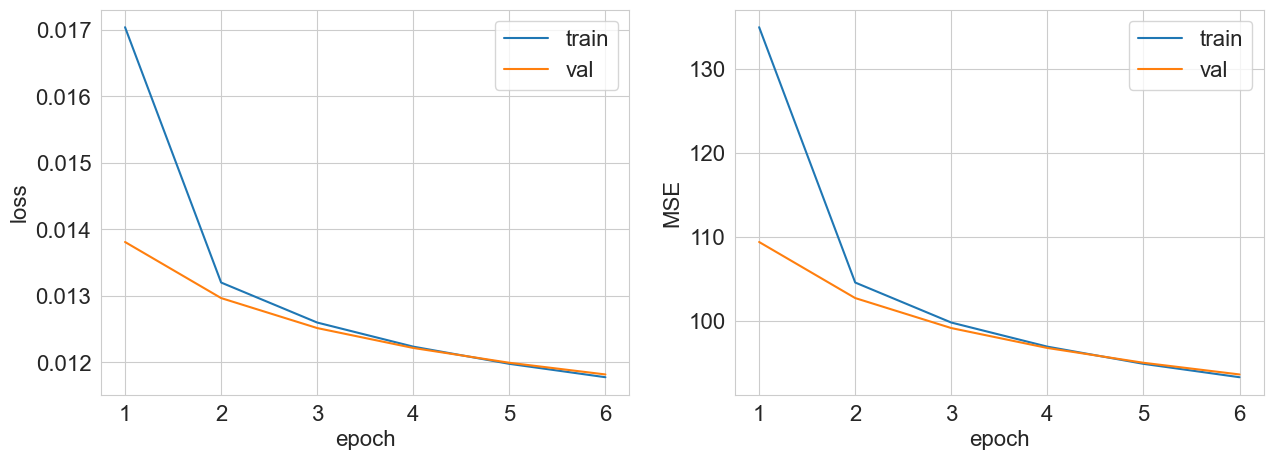

Validation MSE: 93.627


(np.float64(93.29657539767818), np.float64(93.6266510670983))

In [28]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-2),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
                   train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=64, shuffle=True),
                   val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=64, shuffle=False),
                   num_epochs=6)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

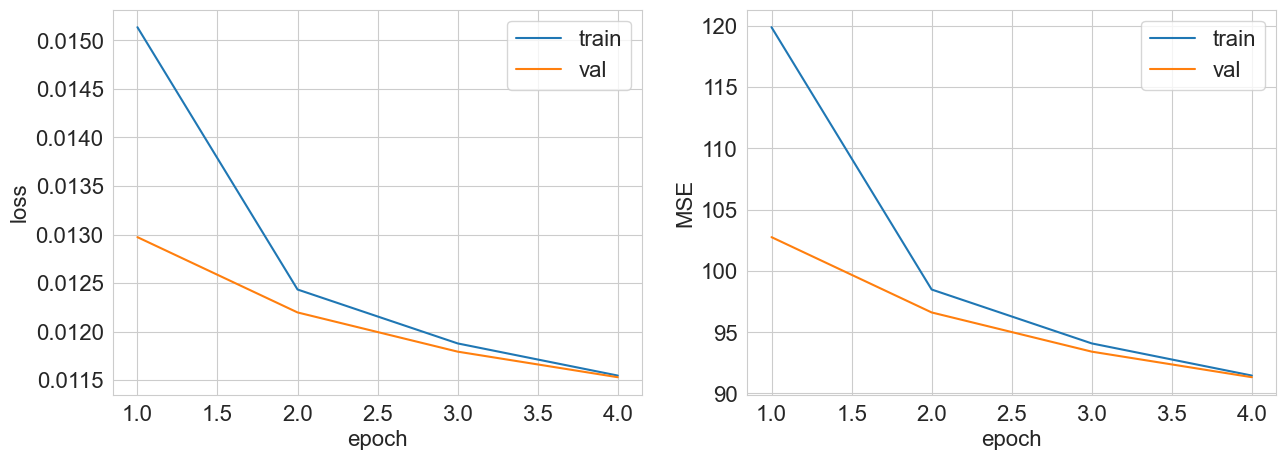

Validation MSE: 91.328


In [35]:
box_train, box_val = [], []
hidden_size = 128
for _ in range(3):
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.SGD(model, lr=1e-3, momentum=0.9),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)
    
    box_train.append(train_res)
    box_val.append(val_res)

[Text(0.5, 0, 'Val MSE SGD + Momentum')]

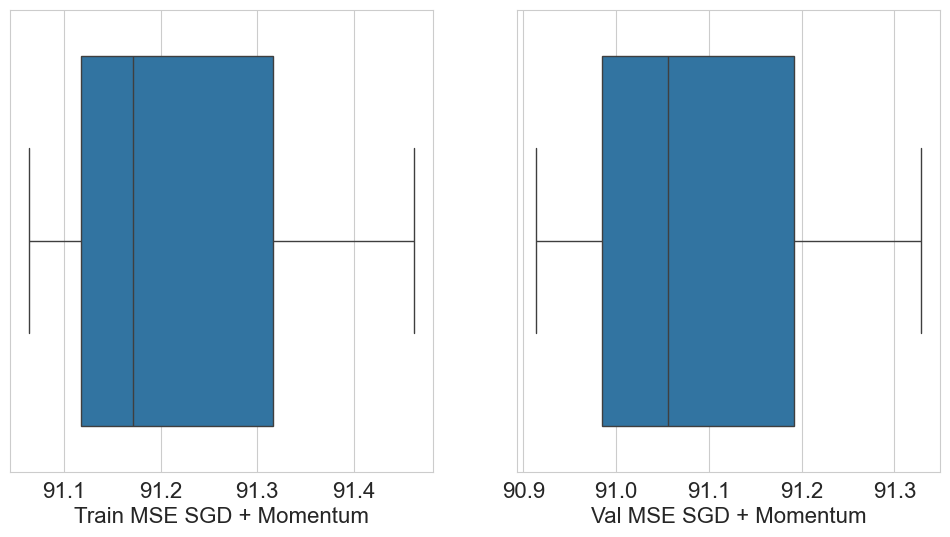

In [36]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax=axes[0], x=box_train)
axes[0].set(xlabel='Train MSE SGD + Momentum')
sns.boxplot(ax=axes[1], x=box_val)
axes[1].set(xlabel='Val MSE SGD + Momentum')

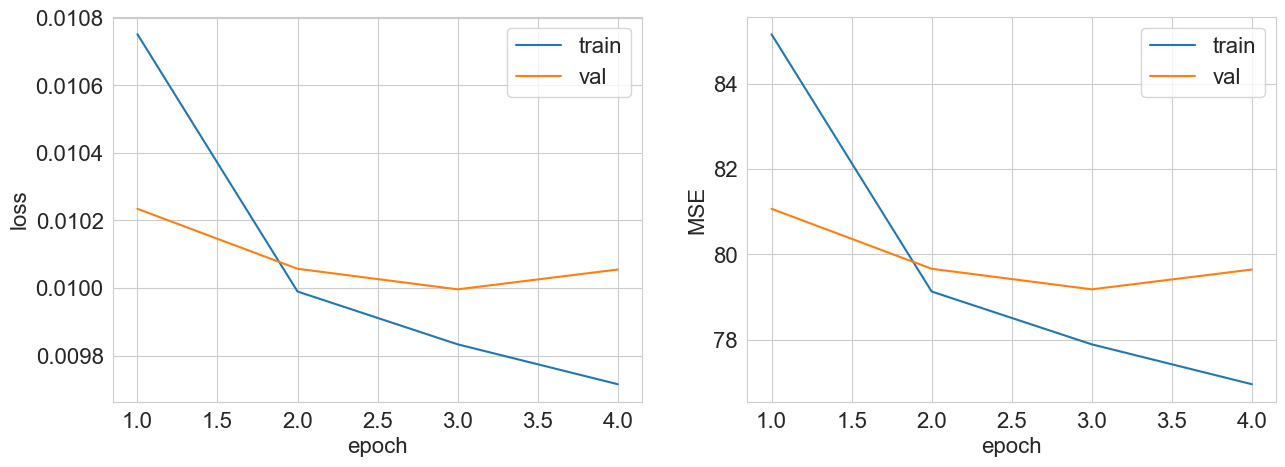

Validation MSE: 79.643


In [37]:
box_train, box_val = [], []
for _ in range(3):
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )

    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)
    
    box_train.append(train_res)
    box_val.append(val_res)

[Text(0.5, 0, 'Val MSE ADAM')]

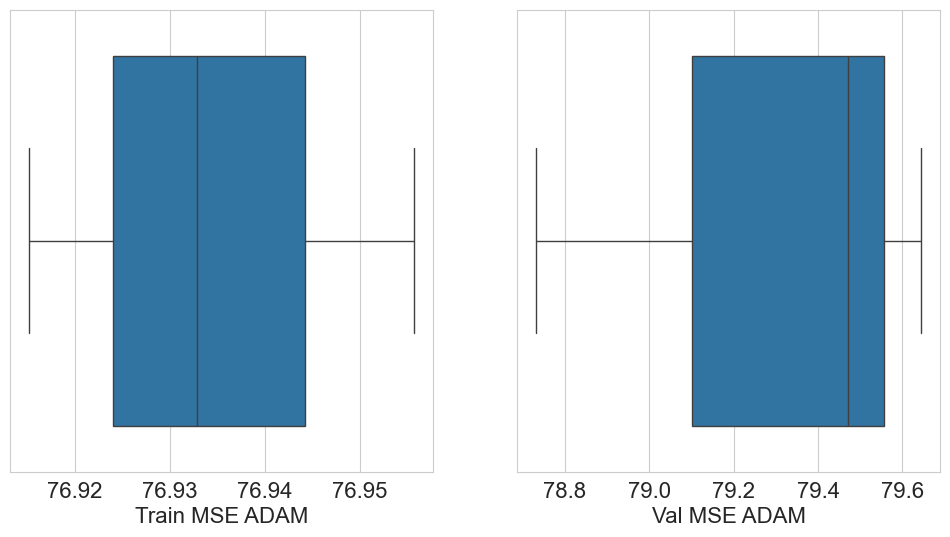

In [38]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax=axes[0], x=box_train)
axes[0].set(xlabel='Train MSE ADAM')
sns.boxplot(ax=axes[1], x=box_val)
axes[1].set(xlabel='Val MSE ADAM')

У ADAМ лучше ошибка, при этом вроде он быстрее сходится. Можно предположить, что это лучший вариант в нашей задаче.

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

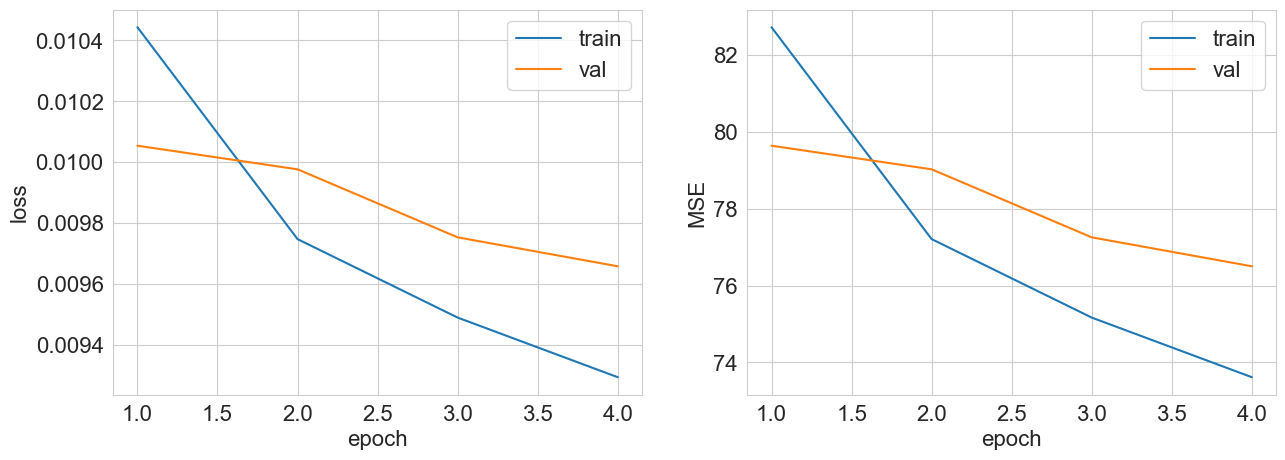

Validation MSE: 76.501


In [39]:
box_train, box_val = [], []
for _ in range(3):
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size * 2),
        mm.ReLU(),
        mm.Linear(hidden_size * 2, hidden_size * 2),
        mm.ReLU(),
        mm.Linear(hidden_size * 2, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)
    
    box_train.append(train_res)
    box_val.append(val_res)

[Text(0.5, 0, 'Val MSE ADAM')]

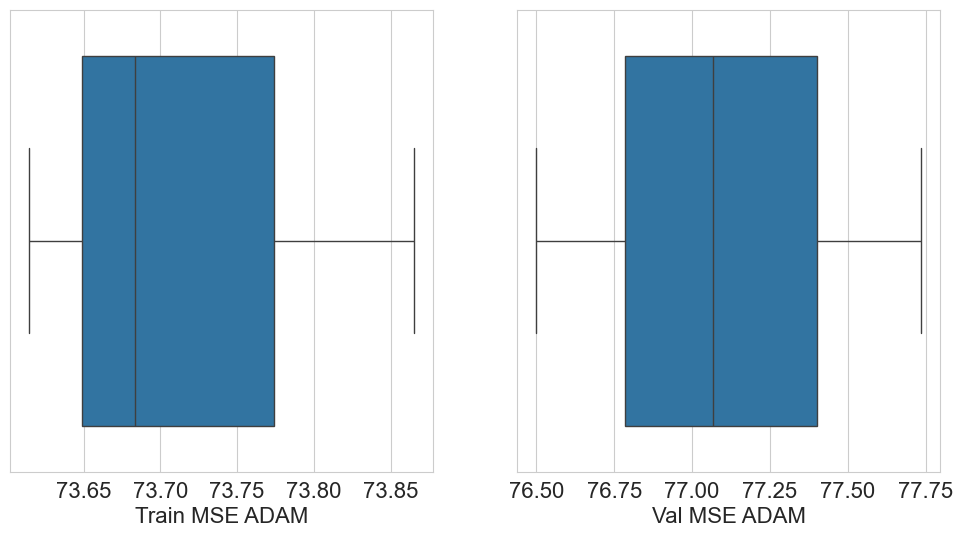

In [40]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax=axes[0], x=box_train)
axes[0].set(xlabel='Train MSE ADAM')
sns.boxplot(ax=axes[1], x=box_val)
axes[1].set(xlabel='Val MSE ADAM')

Качество стало лучше, но надо быть аккуратными.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов. 

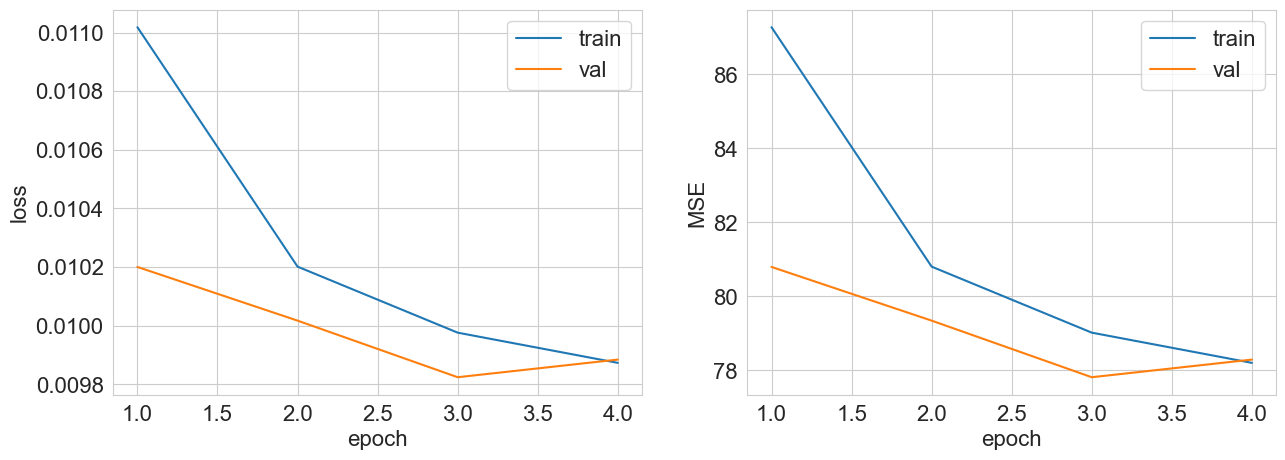

Validation MSE: 78.295


In [15]:
box_train, box_val = [], []
for _ in range(3):
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.Dropout(p=0.2),
        mm.ReLU(),
        mm.Linear(hidden_size, hidden_size),
        mm.Dropout(p=0.2),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)
    
    box_train.append(train_res)
    box_val.append(val_res)

[Text(0.5, 0, 'Val MSE Dropout')]

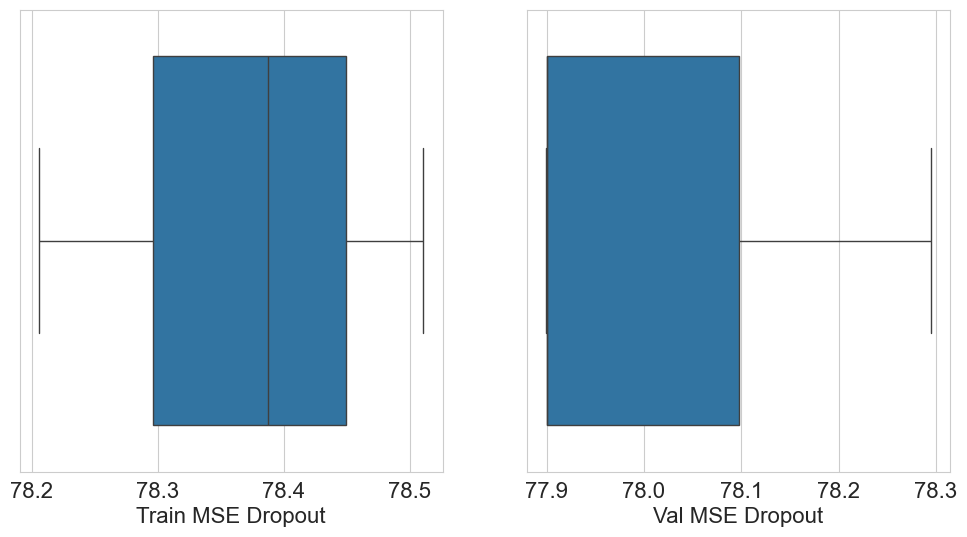

In [16]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax=axes[0], x=box_train)
axes[0].set(xlabel='Train MSE Dropout')
sns.boxplot(ax=axes[1], x=box_val)
axes[1].set(xlabel='Val MSE Dropout')

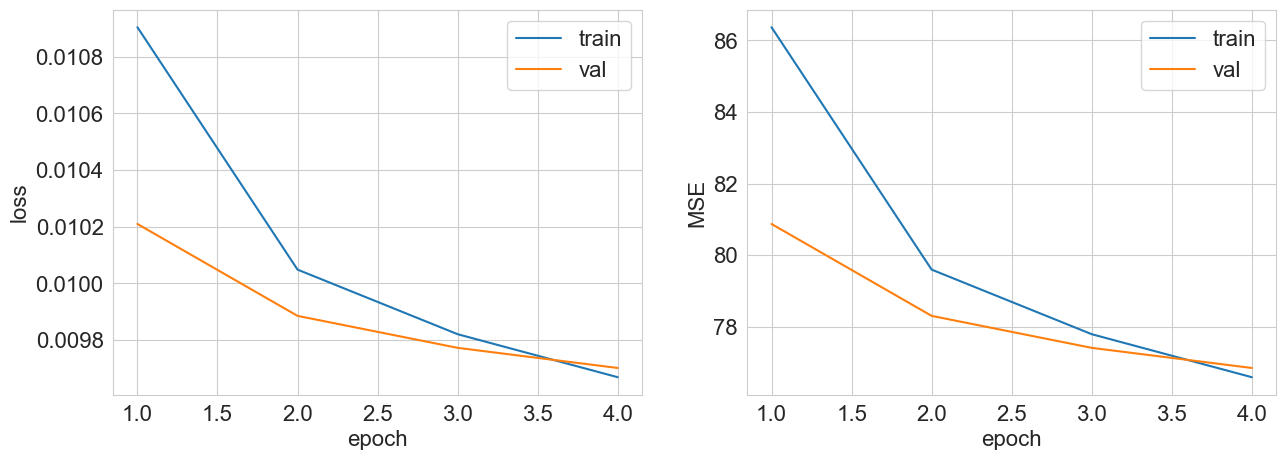

Validation MSE: 76.849


In [43]:
box_train, box_val = [], []
for _ in range(3):
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)
    
    box_train.append(train_res)
    box_val.append(val_res)

[Text(0.5, 0, 'Val MSE Batch')]

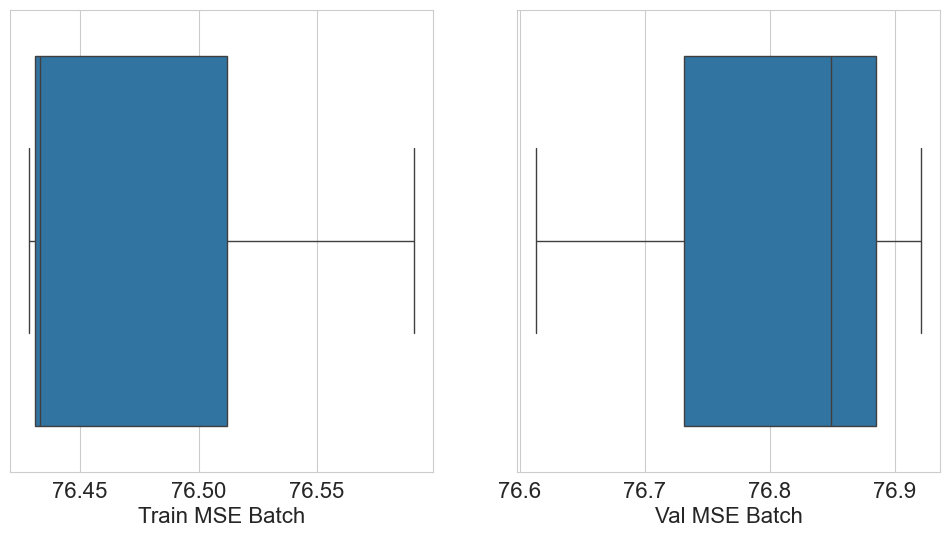

In [45]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax=axes[0], x=box_train)
axes[0].set(xlabel='Train MSE Batch')
sns.boxplot(ax=axes[1], x=box_val)
axes[1].set(xlabel='Val MSE Batch')

C батчем работаем лучше, но видимо это бывает не всегда.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [46]:
box_train, box_val = [], []
lrs = np.logspace(-4, -1, 4)
for lr in lrs:
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=lr),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4, verbose=False)
    
    box_train.append(train_res)
    box_val.append(val_res)
    print(f"for {lr} result {val_res} ")

for 0.0001 result 78.46672034418984 
for 0.001 result 77.33191797337584 
for 0.01 result 77.26299221454846 
for 0.1 result 89.44592357949641 


In [47]:
box_train1, box_val1 = [], []
weight_decay = np.concatenate(([0], np.logspace(-6, -3, 4)))
for w in weight_decay:
    scaler = StandardScaler()
    model = mm.Sequential(
        mm.Linear(X_train.shape[1], hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, hidden_size),
        mm.BatchNormalization(num_features=hidden_size),
        mm.ReLU(),
        mm.Linear(hidden_size, 1),
        mm.Sigmoid()
    )
    
    train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=0.001, weight_decay=w),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(scaler.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4, verbose=False)
    
    box_train1.append(train_res)
    box_val1.append(val_res)
    print(f"for {w} result {val_res} ")

for 0.0 result 77.15601403364084 
for 1e-06 result 76.9724176843708 
for 1e-05 result 78.73200429724713 
for 0.0001 result 82.5290289709723 
for 0.001 result 84.94484219462663 


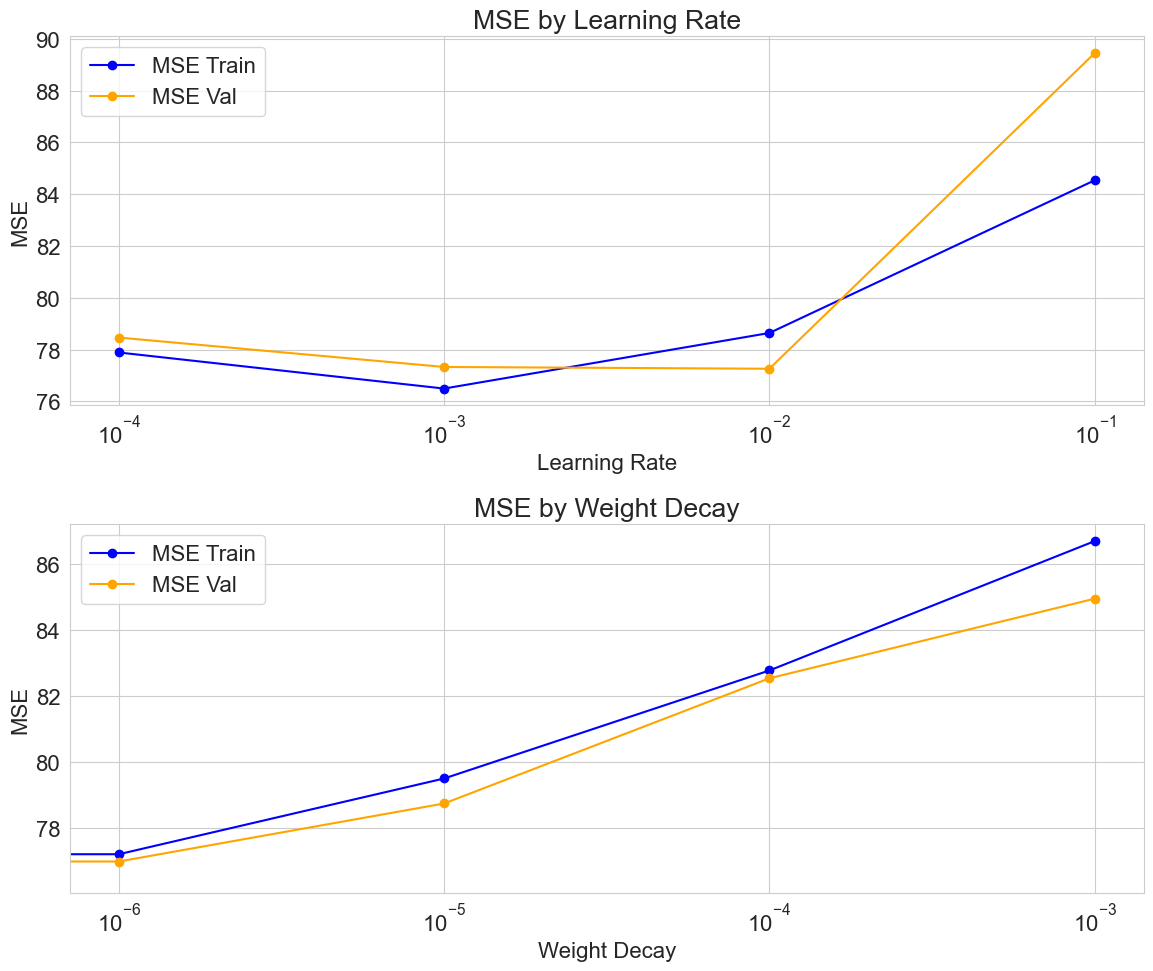

In [48]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(lrs, box_train, marker='o', label='MSE Train', color='blue')
plt.plot(lrs, box_val, marker='o', label='MSE Val', color='orange')
plt.title('MSE by Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(weight_decay, box_train1, marker='o', label='MSE Train', color='blue')
plt.plot(weight_decay, box_val1, marker='o', label='MSE Val', color='orange')
plt.title('MSE by Weight Decay')
plt.xlabel('Weight Decay')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

plt.tight_layout()
plt.show()

Ну зависимость не особо описывается. Отмечу, что лучшее lr это 1e-3 (потенциально), т.к. на графике это выглядит будто подгон под валидацию, а при переходе к тесту будет скачок (тем более разница в пределах погрешности).

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [49]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

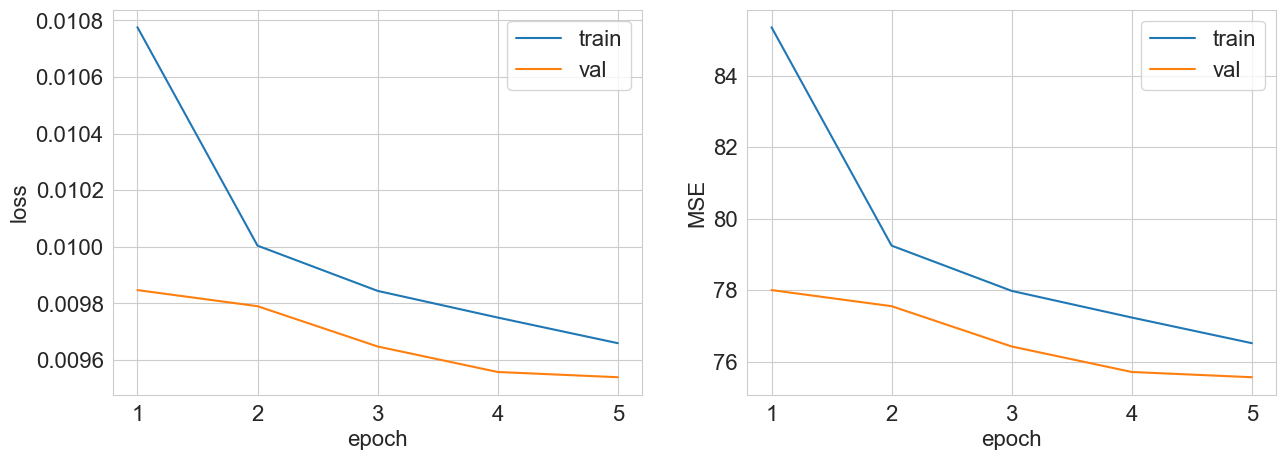

Validation MSE: 75.563


In [51]:
scaler = StandardScaler()
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.BatchNormalization(num_features=hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, hidden_size),
    mm.BatchNormalization(num_features=hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1),
    mm.Sigmoid()
)

train_res, val_res = train_and_validate(model=model,
        optimizer=mm.Adam(model, lr=1e-3, weight_decay=1e-6),
        criterion=mm.MSELoss(),
        metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
        train_loader=mm.DataLoader(scaler.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
        val_loader=mm.DataLoader(scaler.transform(X_test), (normalize(y_test)).reshape((-1, 1)), batch_size=32, shuffle=False),
        num_epochs=5)

Мы на 16% побили Ridge регрессию. Приличный показатель